In [45]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict
import copy

import sys
sys.path.append('../')  

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import pywt
from pywt import wavedec, waverec
from scipy import signal
from statsmodels.robust import mad
from sklearn import preprocessing

# Internal Imports
from wsae_lstm.utils import dictmap_load,pickle_load,pickle_save
from wsae_lstm.models.wavelet import denoise_periods,waveletSmooth

In [13]:
plt.rcParams["figure.figsize"] = (10,6)

In [14]:
dict_dataframes_index=pickle_load(path_filename="../data/interim/cdii_tvt_split.pickle")
#ddi_denoised=pickle_load(path_filename="../data/interim/cdii_tvt_split_denoised.pickle")

In [15]:
dict_dataframes_index.keys()

dict_keys(['csi300 index data', 'nifty 50 index data', 'hangseng index data', 'nikkei 225 index data', 's&p500 index data', 'djia index data'])

In [21]:
#dict_dataframes_index['csi300 index data'][1][1].info()

In [22]:
#dict_dataframes_index['nifty 50 index data'][1][1].info()

In [23]:
#dict_dataframes_index['hangseng index data'][1][1].info()

In [19]:
# Normalization --> you must be able to accurately estimate the minimum and maximum observable values

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

# potential drop in of robust scaler over standard
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler


In [70]:
import scipy
scipy.sparse.issparse(dict_dataframes_index['csi300 index data'][1][1])

False

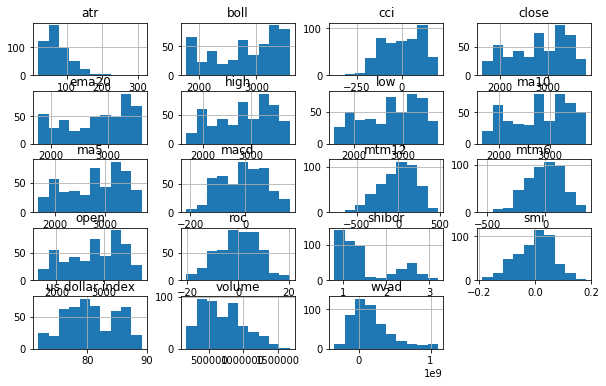

In [25]:
dict_dataframes_index['csi300 index data'][1][1].hist();

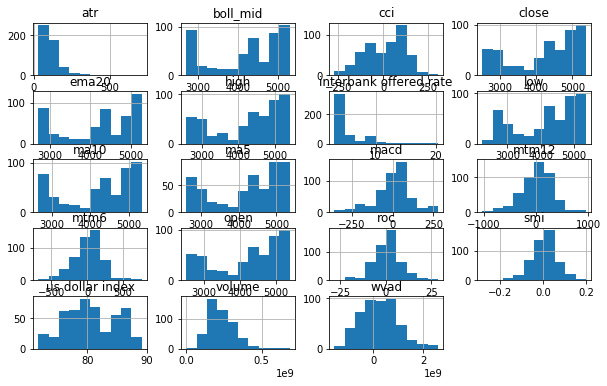

In [26]:
dict_dataframes_index['nifty 50 index data'][1][1].hist();

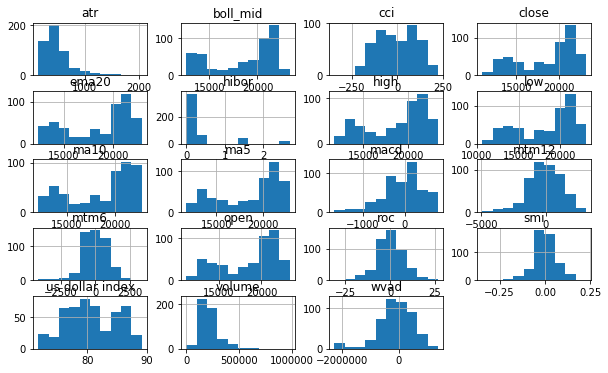

In [48]:
dict_dataframes_index['hangseng index data'][1][1].hist();

In [53]:
scaler = preprocessing.StandardScaler().fit(dict_dataframes_index['hangseng index data'][1][1])

In [54]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
scaler.mean_  

array([ 1.86412344e+04,  1.86529270e+04,  1.88267656e+04,  1.84513721e+04,
        2.15804322e+05, -5.14385570e+01, -3.20633429e+00,  4.80324749e+02,
        1.87104161e+04,  1.86959411e+04,  1.86595707e+04, -1.85709093e+01,
        1.86496582e+04, -5.34259780e+01, -1.52790019e-02, -1.43144101e-03,
       -1.05965164e+05,  8.07497556e+01,  3.23456970e-01])

In [56]:
scaler.scale_

array([3.28336063e+03, 3.28925350e+03, 3.25011404e+03, 3.31992134e+03,
       9.59428781e+04, 4.63145610e+02, 1.05701901e+02, 2.57772639e+02,
       3.25095804e+03, 3.21778728e+03, 3.26071230e+03, 9.45207593e+02,
       3.27031841e+03, 1.28870858e+03, 7.75165334e+00, 6.45537952e-02,
       6.31565566e+05, 4.24004173e+00, 6.62951528e-01])

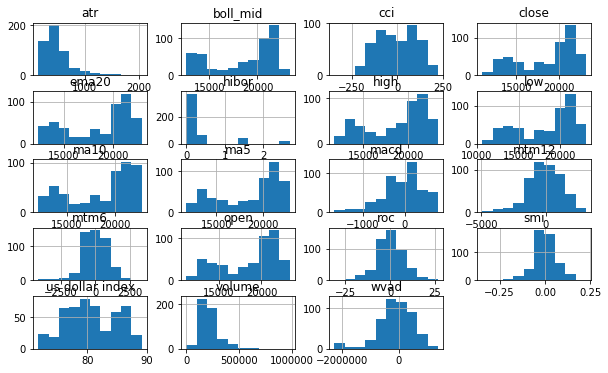

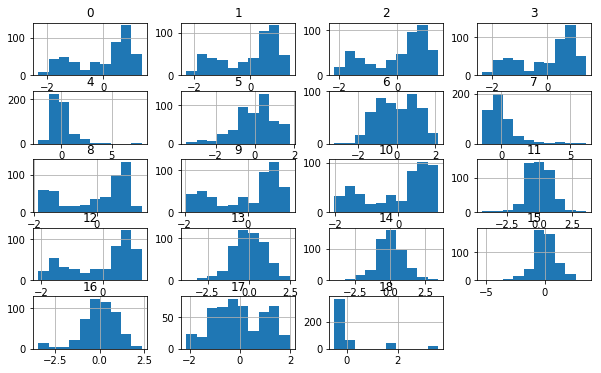

In [50]:
dict_dataframes_index['hangseng index data'][1][1].hist();
pd.DataFrame(X_scaled).hist();

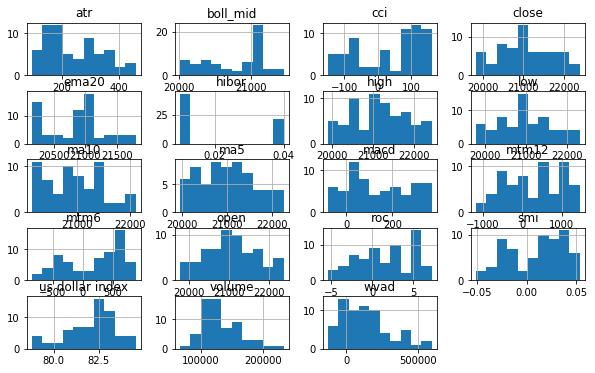

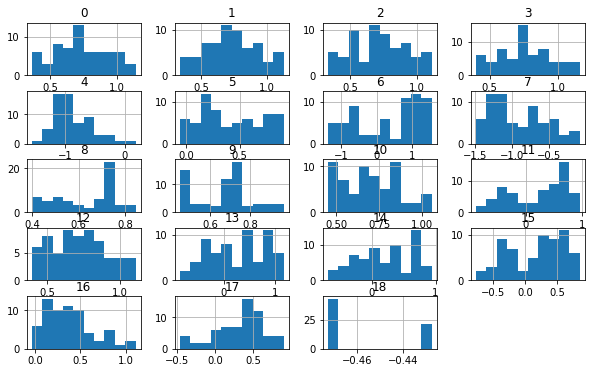

In [61]:
dict_dataframes_index['hangseng index data'][1][2].hist();
pd.DataFrame(scaler.transform(dict_dataframes_index['hangseng index data'][1][2])).hist();